# Projections and Projection Matrices

## Projection to a Line

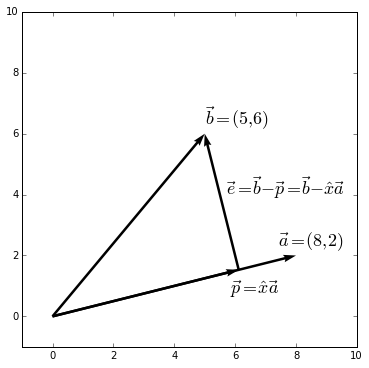

In [183]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

def pretti(v): return int(v) if v == math.floor(v) else v # print ints pretty
def join(*args): return np.concatenate(args)
def tos(v): return '(' + str(pretti(v[0])) + ', ' + str(pretti(v[1])) + ')'

z = np.array([0, 0])
b = np.array([5, 6])
a = np.array([8, 2])
p = a * (a.dot(b)/a.dot(a))
e = b - p

data = np.array([ join(z, a), join(z, b), join(p, e), join(z,p) ])

X,Y,U,V = zip(*data)
# X is an array that contains the x positions of all the vectors
# Y contains the y position
# U, V are arrays containing horizontal and vertical values of all vectors

plt.figure(figsize=(6,6)) # initialize the figure
ax = plt.gca() # get current axes

# Quiver Docs
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.quiver
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
ax.set_aspect(1.)

plt.text(5.7, 4, r'$\vec{e} = \vec{b}-\vec{p} = \vec{b}-\hat{x}\vec{a}$', size=18)
plt.text(b[0], b[1] + 0.3 ,r'$\vec{b}=' + tos(b) + '$', size=18)
plt.text(a[0]-0.6, a[1] + 0.3 ,r'$\vec{a}=' + tos(a) + '$', size=18)
plt.text(p[0] - 0.3, p[1] - 0.8 ,r'$\vec{p}=\hat{x}\vec{a}$', size=18)
plt.show()

## Calculate $e$ and $p$

I will show two ways to calculate the projection. 

\begin{align}
0 &= \vec{e} \bullet{}\vec{a} && \vec{e} \perp \vec{a} \text{ so the dot product is zero}\\
0 &= (\vec{b}-\hat{x}\vec{a})\bullet{}\vec{a} && \text{notice } \vec{e} = \vec{b}-\vec{p} = \vec{b}-\hat{x}\vec{a}\\
0 &= \vec{b}\bullet \vec{a} - \vec{a} \hat{x}\bullet \vec{a} && \text{distribute } \vec{a}\\
0 &= (\vec{b} \bullet \vec{a}) - \hat{x} (\vec{a} \bullet \vec{a}) && 
\text{notice } \hat{x} \text{ is a scalar, so the last term can be } \hat{x} \vec{a} \bullet \vec{a}\\
\hat{x} (\vec{a} \bullet \vec{a}) &= (\vec{b} \bullet \vec{a})\\
\hat{x} &= \dfrac{\vec{b} \bullet \vec{a}}{\vec{a} \bullet \vec{a}} 
\implies \vec{p} = \dfrac{\vec{b} \bullet \vec{a}}{\vec{a} \bullet \vec{a}} \vec{a} && 
\text{because } \vec{p} = \hat{x}\vec{a}
\end{align}

We can summarize the projection to the matrix as, $\vec{p} = P\vec{b}$. This is easy to find if we present the equation the other way around. Notice that with vectors the order is inconsequential, because $\vec{a} \bullet \vec{b} = \vec{b} \bullet \vec{a}$

\begin{align}
0 &= \vec{a} \bullet \vec{e} && \vec{a}, \vec{e} \text{ on opposite sides}\\
0 &= (\vec{a} \bullet \vec{b}) - \hat{x}(\vec{a} \bullet \vec{a})\\
\hat{x}(\vec{a} \bullet \vec{a}) &= (\vec{a} \bullet \vec{b})\\
\hat{x} &= \dfrac{\vec{a} \bullet \vec{b}}{\vec{a} \bullet \vec{b}} = \dfrac{\vec{a}^T\vec{b}}{\vec{a}^T\vec{a}}
\end{align}

With $\hat{x}$ in this form, we can calculate the permutation matrix, $P$ from $\vec{p} = P\vec{b}$

\begin{align}
\vec{p} &= \vec{a}\dfrac{\vec{a}^T\vec{b}}{\vec{a}^T\vec{a}}\\
\vec{p} &= \dfrac{\vec{a}\vec{a}^T}{\vec{a}^T\vec{a}}\vec{b}
\implies P = \dfrac{\vec{a}\vec{a}^T}{\vec{a}^T\vec{a}} && \text{because } \vec{p}= P\vec{b}
\end{align}

## Project onto a plane

Note that $\vec{a}^T\vec{a}$ in the denominator evaluates to a scalar. If we want to project onto a plane, the denominator becomes $A^TA$, which evaluates to a matrix.

- Division by a matrix has no meaning. You cannot divide by a martix.
- In arithmatic, we undo multiplication with division. 
- To undo the effects of a matrix multiplication, we multiply the inverse of the matrix. $A^{-1}A\vec{b}=\vec{b}$
- We must re-arrange the equation so that we use inverse matrices instead of division. 

We can think of projecting onto a plane as projecting onto multiple vectors. To project $\vec{b}$ onto $A$, we are looking for the vector $\hat{x}$, such that $\vec{p}=A\hat{x}$, where $\vec{p}$ is the point on the plane closest to $\vec{b}$. The first step is to find the vector $\hat{x}$.

Like the first example, we define the error vector, $\vec{e}$, as the vector that goes from the plane to $\vec{b}$

$\vec{e} = \vec{b} - A\hat{x}$

Now we want to find the closest point on $A$ to  $\vec{b}$. If we consider $A$ to be a collection of vectors $(\vec{a}_1, \vec{a}_2)$, we can find the components of $\hat{x}$ individually

\begin{align}
0 &= \vec{a}_1^T\vec{e}\\
0 &= \vec{a}_1^T(\vec{b} - \vec{a}_1\hat{x}_1) && \text{Verify! It could be }  
\vec{a}_1^T(\vec{b} - A\hat{x})
\end{align}

Here $\hat{x}_1$ is a scalar and it is the first component of our vector $\hat{x}$. We can find the other component of $\hat{x}$ by solving the same equation with $\vec{a}_2$. There is a simple way to write the equation that captures all components at once.

$A^T(\vec{b}-A\hat{x})$

Which can be written as 

$A^T\vec{b} = A^TA\hat{x}$

Which can be solved for $\hat{x}$

$(A^TA)^{-1}A^T\vec{b} = \hat{x}$

